In [1]:
import numpy as np, curvedsky as cs, plottools as pl, cmb as CMB, local, tqdm
from matplotlib.pyplot import *

In [2]:
def snr_ilens(Ag,ucl,L,corr=1.):
    #Nl = 1./(1./Ag['EB']+1./Ag['TB']+1./Ag['BB'])
    SN = (2*L+1.)*ucl[3]/Ag['BB'] * corr**2
    sn = np.pi/180. * np.sqrt( np.sum(SN[2:]) )
    return sn

In [19]:
def snr_eb_l(lcl,ocl,L):
    SN = (2*L+1.)*(lcl[1,:]-lcl[2,:])**2/( ocl[1,:]*ocl[2,:] )
    sn = np.pi/180. * 2. * np.sqrt( np.cumsum(SN) ) 
    return sn

In [59]:
Lmax  = 3000       # maximum multipole of output normalization
L = np.linspace(0,Lmax,Lmax+1)
sig = 1.
theta = 1.

In [55]:
ucl = CMB.read_camb_cls('../data_local/cosmo2017_10K_acc3_scalCls.dat',output='array')[:,:Lmax+1]
lcl = CMB.read_camb_cls('../data_local/cosmo2017_10K_acc3_lensedCls.dat',ftype='lens',output='array')[:,:Lmax+1]

In [60]:
ocl = local.noise(lcl,sig,theta,lBmin=2)
snrl_eb = snr_eb_l(lcl,ocl,L)

In [82]:
dell = 100
bn   = int((Lmax-dell)/dell)
print(bn)
rlmins = np.linspace(200,200+dell*(bn-1),bn,dtype=np.int)
rlmaxs = rlmins + dell
print(rlmins)

29
[ 200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400 1500
 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900
 3000]


/tmp/ipykernel_8222/2265527241.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rlmins = np.linspace(200,200+dell*(bn-1),bn,dtype=np.int)


In [83]:
snrl_rec = np.zeros(len(rlmins))
snrl_eb  = np.zeros(len(rlmins))
for l, (rlmin, rlmax) in enumerate(zip(rlmins,rlmaxs)):
    rcl = lcl.copy()
    rcl[:,:rlmin] = 0.
    rcl[:,rlmax+1:] = 0.
    Ag = local.rec(Lmax,100,Lmax,rcl[:,:Lmax+1],ocl[:,:Lmax+1],qdo=['BB'])
    snrl_rec[l] = snr_ilens(Ag,ucl,L,corr=1.)
    snrl_eb[l] = snr_eb_l(lcl[:,rlmin:rlmax+1],ocl[:,rlmin:rlmax+1],L[rlmin:rlmax+1])[-1]
    print(rlmin,rlmax,snrl_rec[l],snrl_eb[l])

 norm qBB
200 300 56.6904884575108 88.24173166407289
 norm qBB


/tmp/ipykernel_8222/2489700825.py:3: RuntimeWarning: invalid value encountered in true_divide
  SN = (2*L+1.)*ucl[3]/Ag['BB'] * corr**2


300 400 215.8124793862463 189.63817708201333
 norm qBB
400 500 186.91502809857667 175.8464301114573
 norm qBB
500 600 111.91044594608873 133.6702255689064
 norm qBB
600 700 322.9217695359153 238.31587656377704
 norm qBB
700 800 282.0423339899412 224.57215855994338
 norm qBB
800 900 156.06545392142476 168.72386473827657
 norm qBB
900 1000 372.6476325794586 270.42722786707304
 norm qBB
1000 1100 350.2811881774813 267.23988070450457
 norm qBB
1100 1200 165.22234331765335 186.60917592731397
 norm qBB
1200 1300 293.3750985382427 255.18692998346515
 norm qBB
1300 1400 303.86331923737885 265.92195140263544
 norm qBB
1400 1500 159.55898536192316 195.25645759350658
 norm qBB
1500 1600 223.11456327522868 236.33225363118697
 norm qBB
1600 1700 245.5916902813787 253.8141009390546
 norm qBB
1700 1800 136.1324105820554 189.98268033926823
 norm qBB
1800 1900 133.64963553422774 192.4842114374904
 norm qBB
1900 2000 151.50246105192005 208.9410315411349
 norm qBB
2000 2100 95.7189962713406 166.458963711

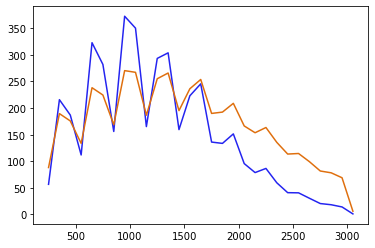

In [84]:
lc = (rlmins+rlmaxs)*.5
plot(lc,snrl_rec)
plot(lc,snrl_eb)